In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

data reading

In [66]:
data = pd.read_csv("data_for_lr.csv")

In [6]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [7]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [9]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [12]:
data = data.dropna()
print("the shape of the data:", data.shape)

the shape of the data: (699, 2)


#splitting data

In [30]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)
test_input = np.array(data.x[500:699]).reshape(199, 1)
test_output = np.array(data.y[500:699]).reshape(199, 1)

In [31]:
print(f"training input data shape:{train_input.shape}")
print(f"training output data shape:{train_output.shape}")
print(f"testing input data shape:{test_input.shape}")
print(f"testing output data shape:{test_output.shape}")

training input data shape:(500, 1)
training output data shape:(500, 1)
testing input data shape:(199, 1)
testing output data shape:(199, 1)


#<font color = "green">Linear regression</font>

forward propogation

f(x) = m*x + c;

In [48]:
def forward_propogation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m, train_input) + c
    return predictions

cost function 

In [47]:
def cost_fun(train_output, predictions):
    cost = np.mean((train_input - predictions)**2)*0.5
    return cost

gradient descent 

In [49]:
def gradient_descent(train_input, train_output, predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives

In [51]:
def update_parameters(parameters, derivatives, learningrate):
    parameters["m"] = parameters["m"] - learningrate*derivatives["dm"]
    parameters["c"] = parameters["c"] - learningrate*derivatives["dc"]
    return parameters

In [56]:
def train(train_input, tarin_output, learningrate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()
    loss = list()
    
    for i in range(iters):
        predictions = forward_propogation(train_input, parameters)
        cost = cost_fun(train_output, predictions)
        loss.append(cost)
        print(f"Iteration{i+1}, Loss={cost}")
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")

        legend = ax.legend()
        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()
        
        
        derivatives = gradient_descent(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learningrate)

    return parameters, loss

    


Iteration1, Loss=1044.8713094246757


<Figure size 640x480 with 0 Axes>

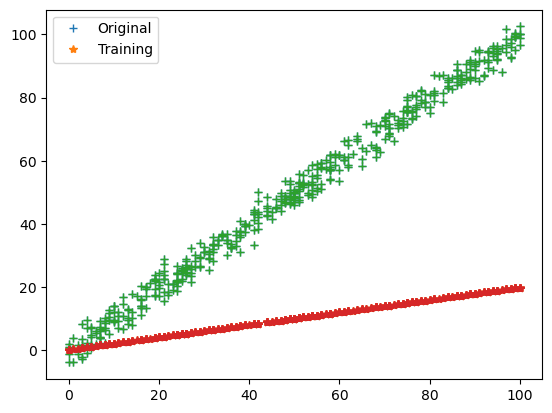

Iteration2, Loss=475.54118139961827


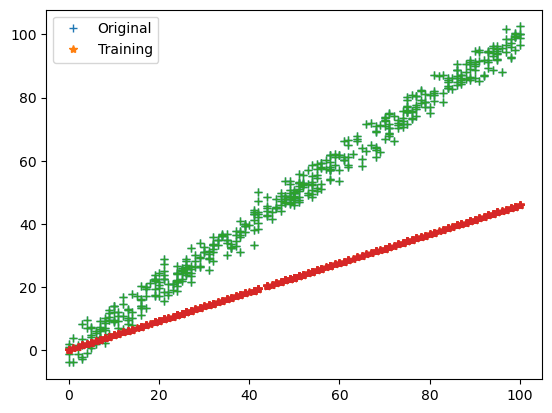

Iteration3, Loss=216.75446688710602


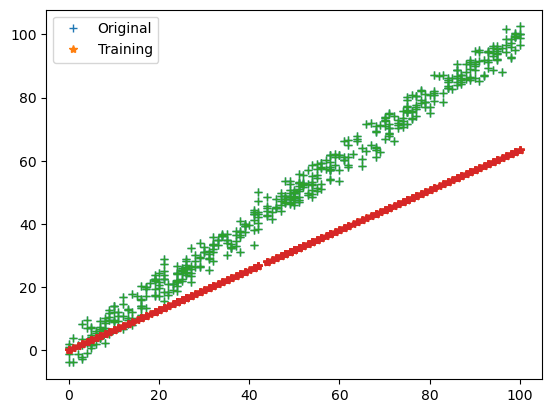

Iteration4, Loss=99.01865573738944


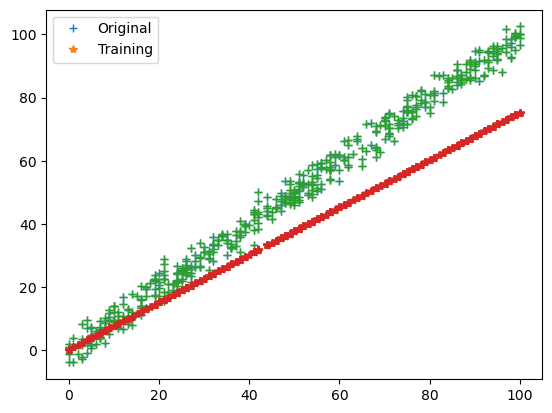

Iteration5, Loss=45.383555240830525


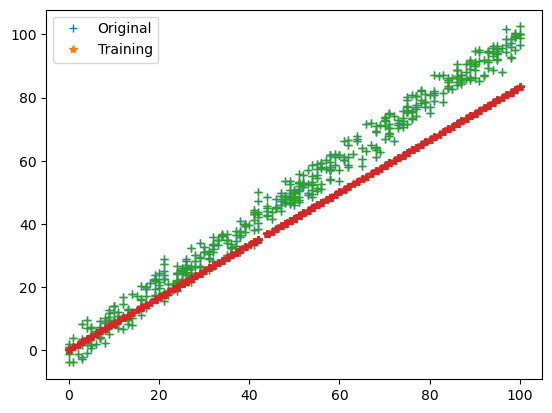

Iteration6, Loss=20.902254995707363


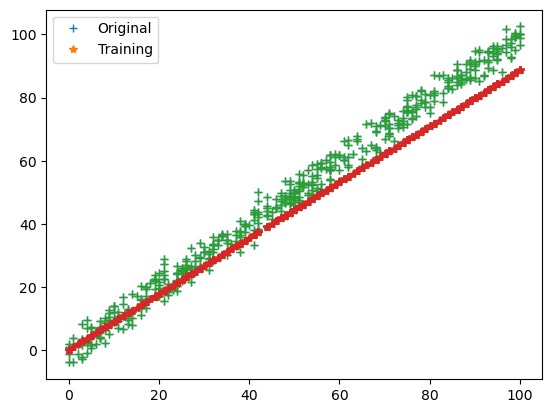

Iteration7, Loss=9.696049447801558


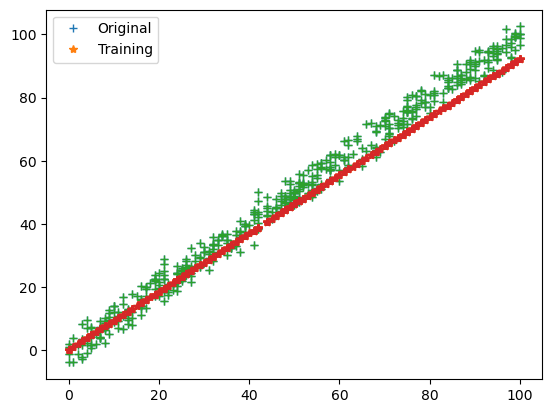

Iteration8, Loss=4.5450892956234155


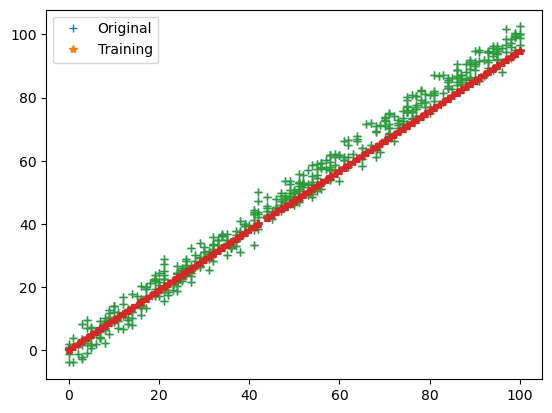

Iteration9, Loss=2.163170731677923


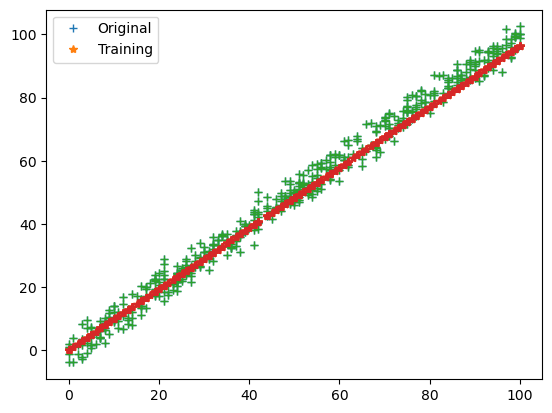

Iteration10, Loss=1.0522331264729619


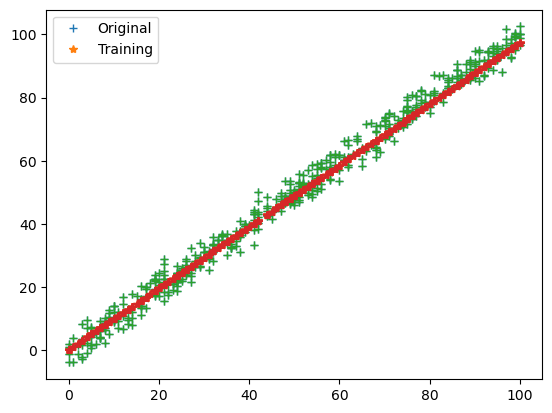

Iteration11, Loss=0.5278180836506148


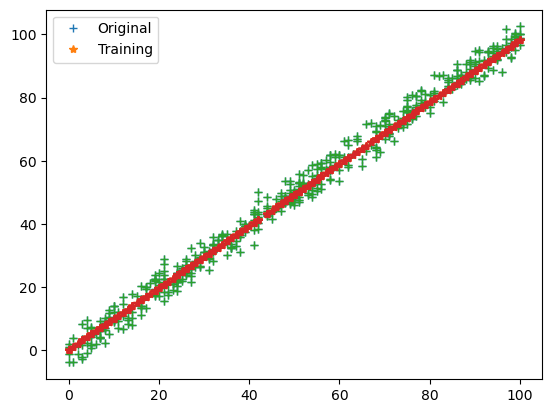

Iteration12, Loss=0.2761619244423609


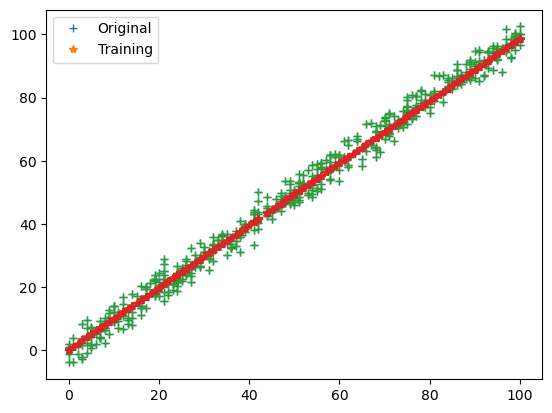

Iteration13, Loss=0.15273802117287316


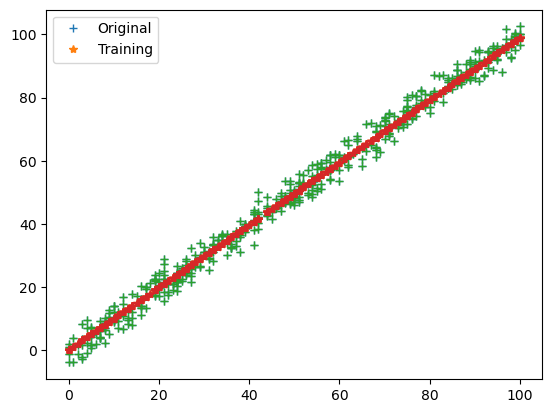

Iteration14, Loss=0.09051168407709236


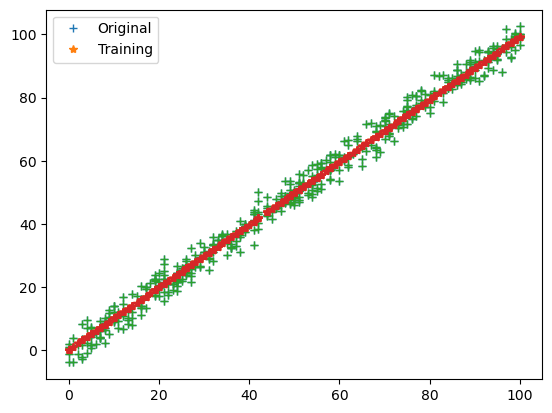

Iteration15, Loss=0.05808389787994875


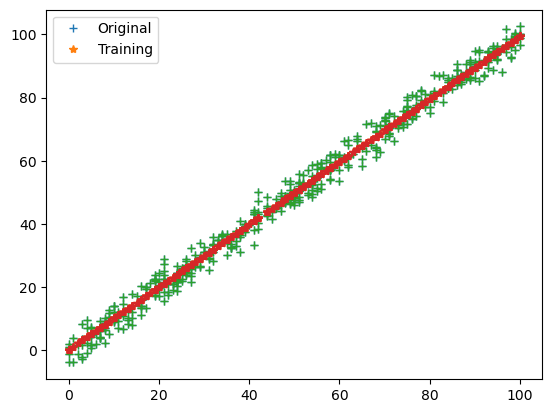

Iteration16, Loss=0.040545221179533616


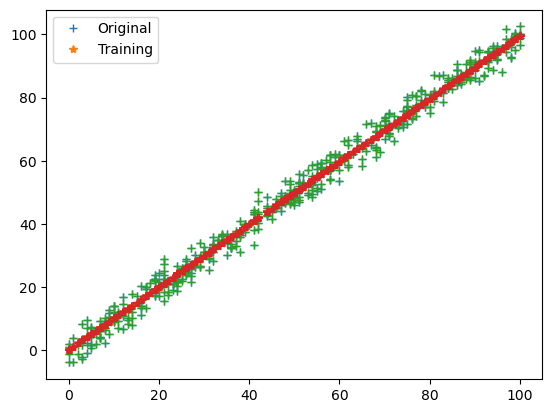

Iteration17, Loss=0.030684191162467088


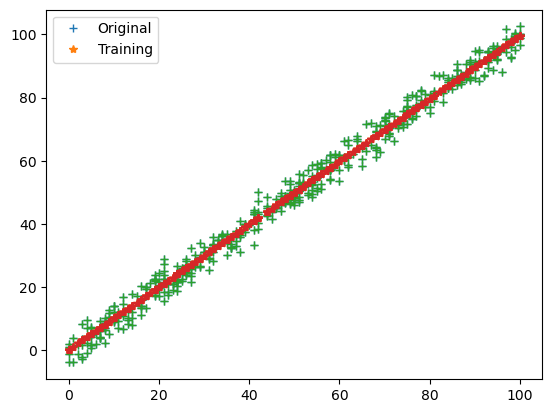

Iteration18, Loss=0.024927849809198214


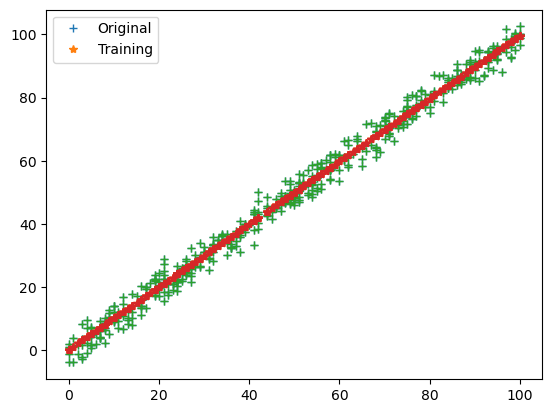

Iteration19, Loss=0.02145232286166963


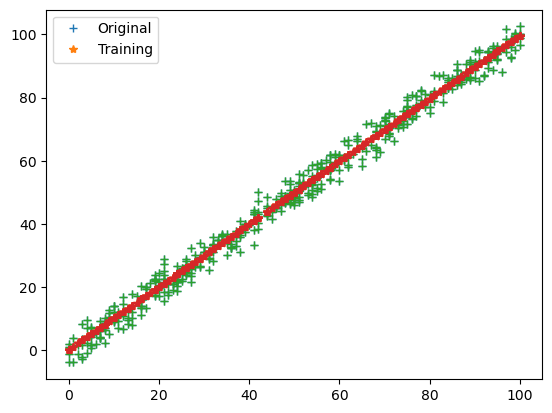

Iteration20, Loss=0.01929350290163643


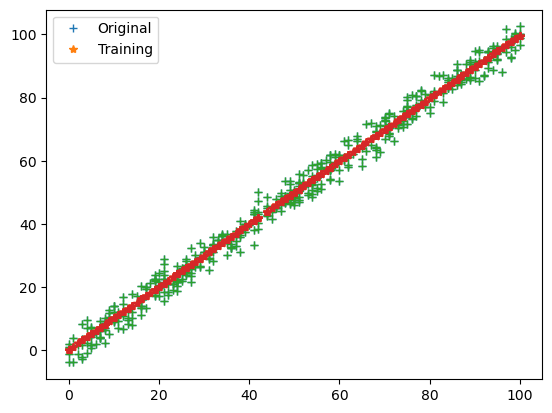

In [62]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

Iteration1, Loss=60.462199476730774


<Figure size 640x480 with 0 Axes>

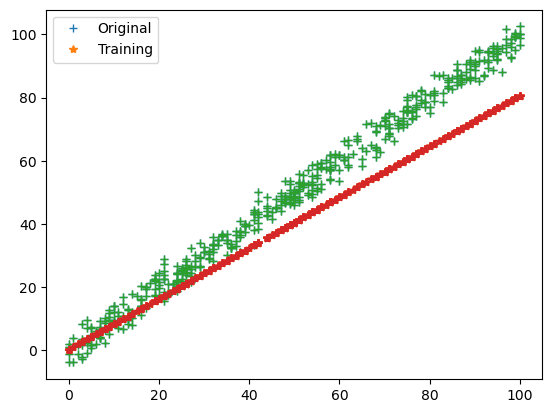

Iteration2, Loss=56.63090653463444


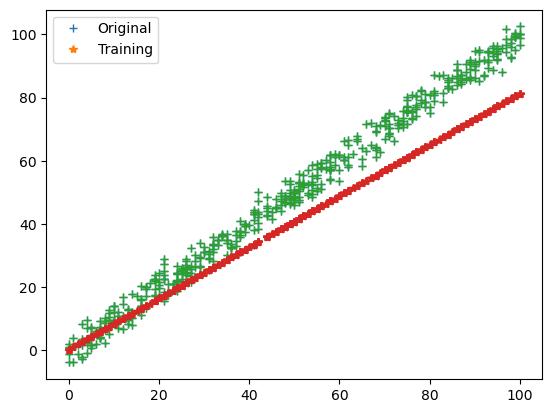

Iteration3, Loss=53.044013676440606


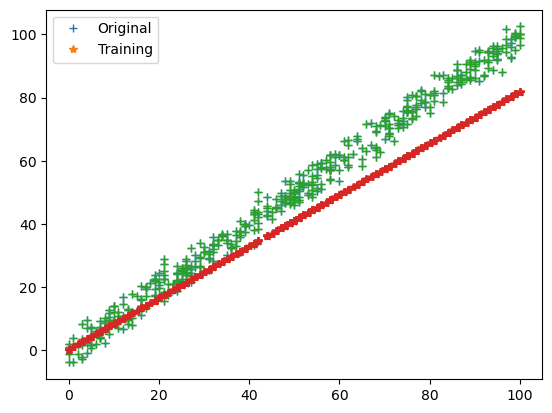

Iteration4, Loss=49.68587927003634


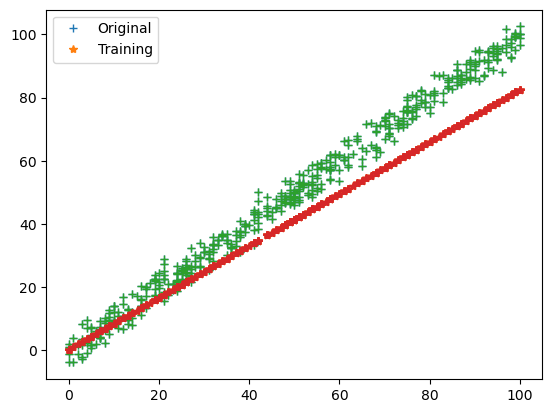

Iteration5, Loss=46.541864432973256


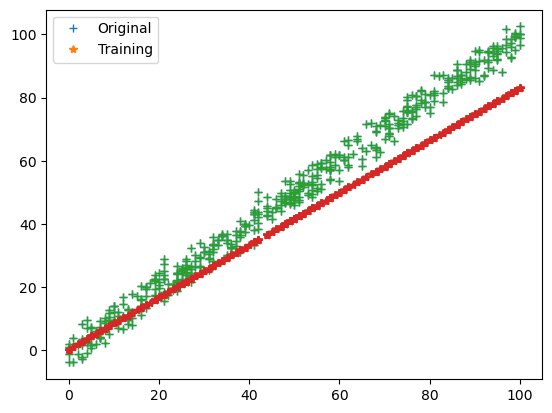

Iteration6, Loss=43.59826869331135


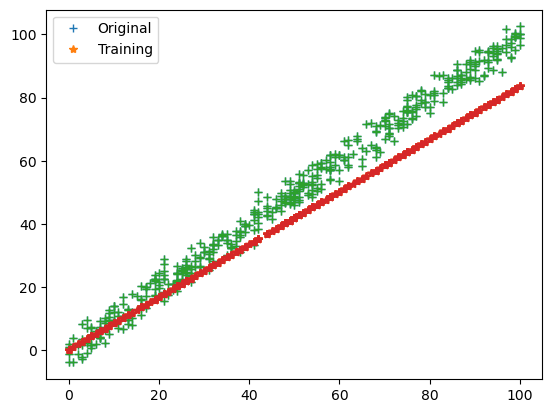

Iteration7, Loss=40.84226978044224


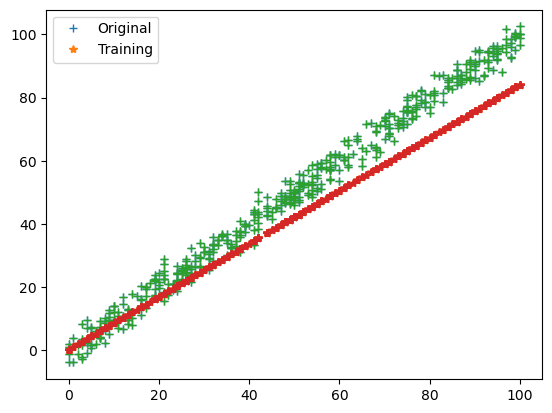

Iteration8, Loss=38.26186728072582


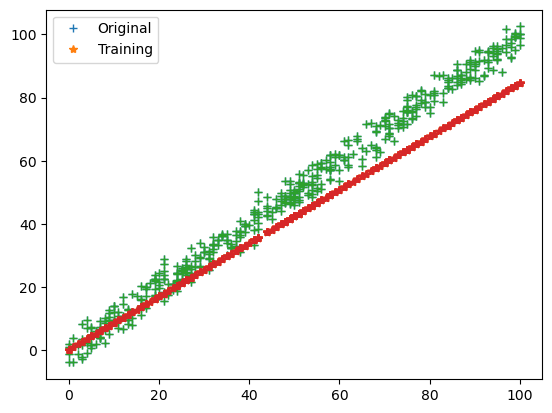

Iteration9, Loss=35.84582990980214


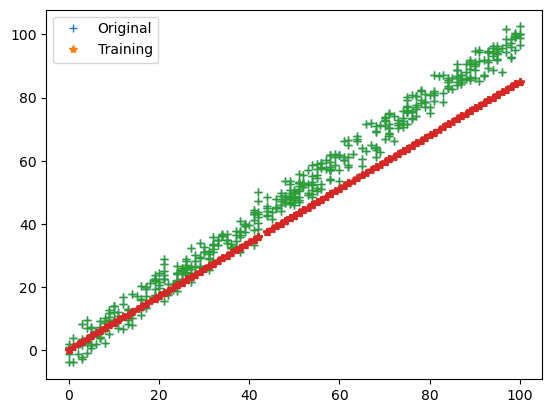

Iteration10, Loss=33.58364616937339


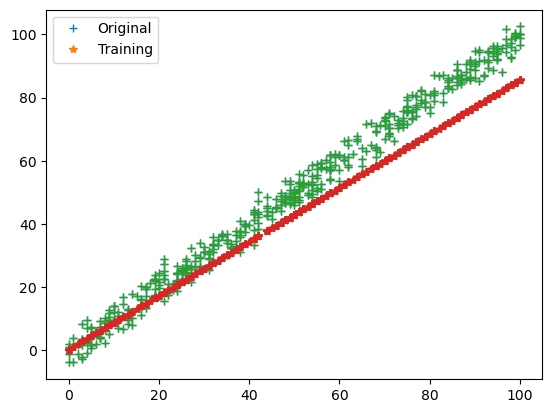

Iteration11, Loss=31.465478171161326


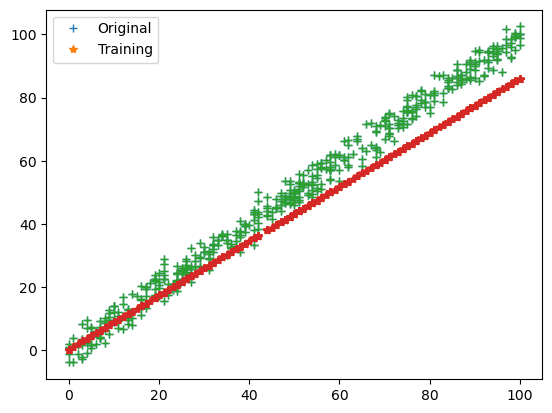

Iteration12, Loss=29.48211842469777


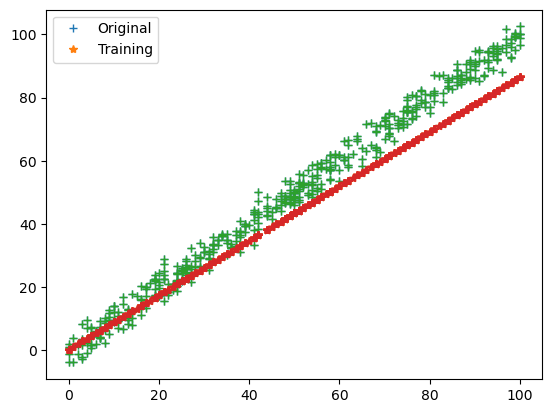

Iteration13, Loss=27.624949398663915


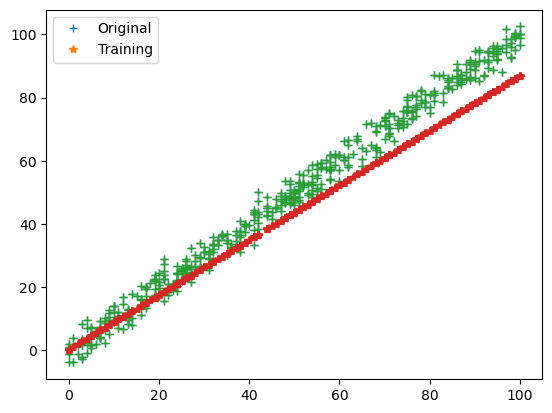

Iteration14, Loss=25.885905677710856


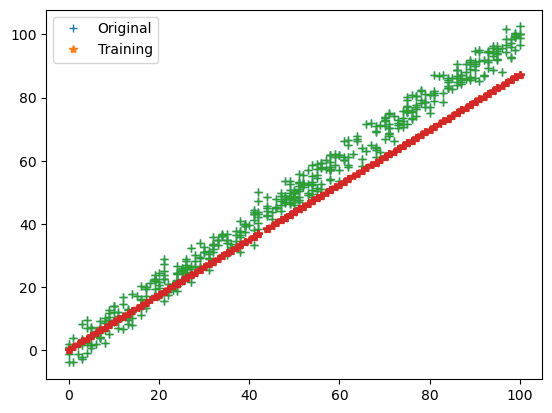

Iteration15, Loss=24.257438548129162


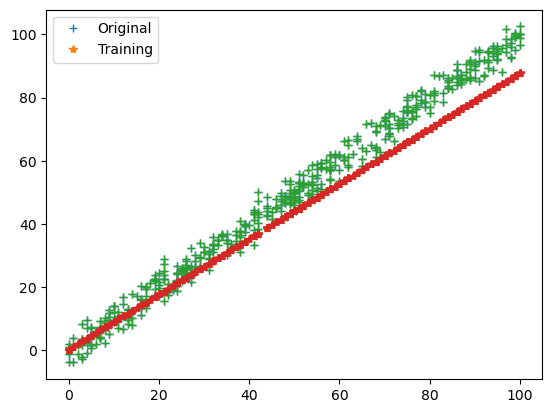

Iteration16, Loss=22.732482856433247


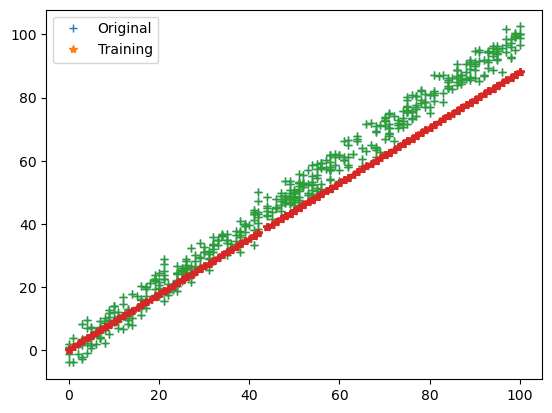

Iteration17, Loss=21.304425994940917


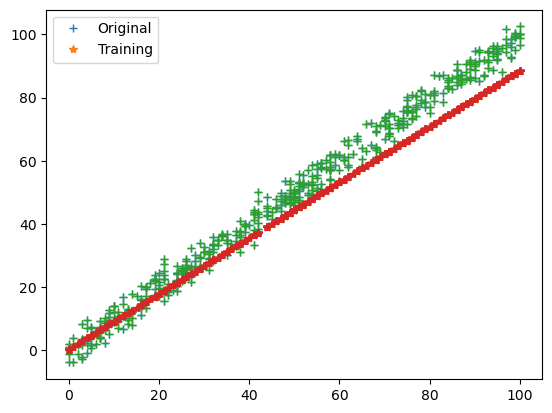

Iteration18, Loss=19.967078877795007


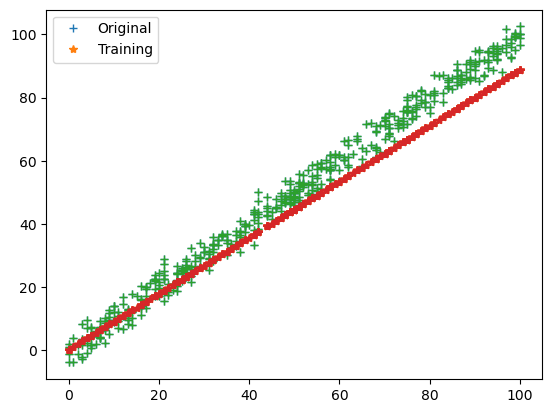

Iteration19, Loss=18.714648779645334


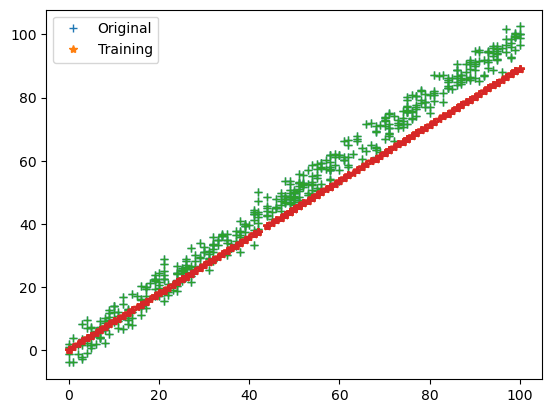

Iteration20, Loss=17.54171391741107


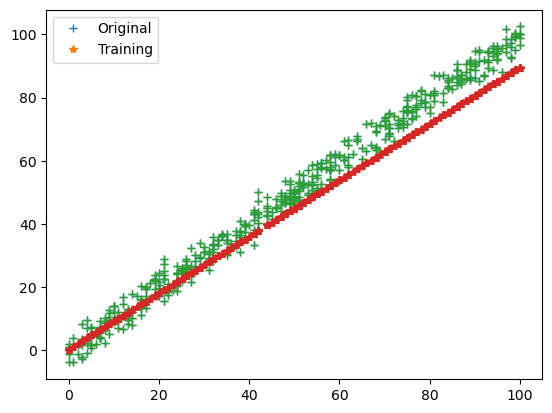

Iteration21, Loss=16.443199663223428


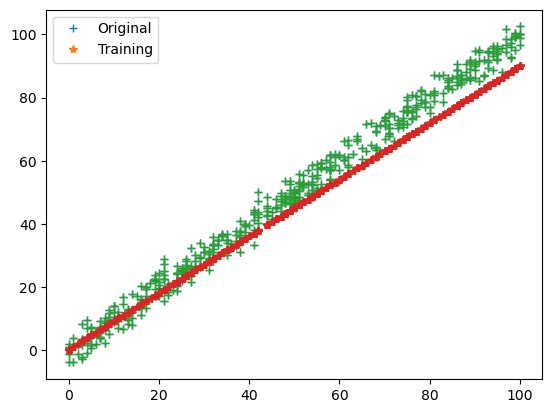

Iteration22, Loss=15.414356283833014


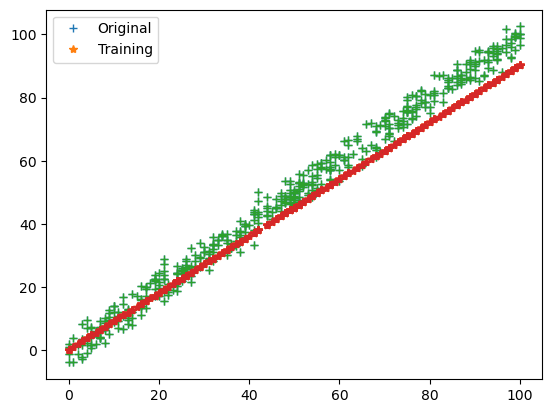

In [63]:
parameters, loss = train(train_input, train_output, 0.00001, 22)